In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


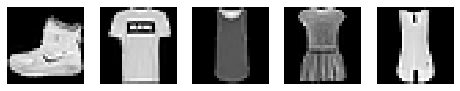

In [4]:
import random
random.seed(42)
from sklearn import metrics
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
for idx in range(5):
  rnd_index = random.randint(0, 59999)
  plt.subplot(1,5,idx+1),plt.imshow(x_train[idx],'gray')
  plt.xticks([]),plt.yticks([])
plt.show()


In [ ]:
import numpy as np
from keras import utils as np_utils
x_train = (x_train.astype(np.float32))/255.0
x_test = (x_test.astype(np.float32))/255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
input_shape = x_train.shape[1:]


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization
from keras.models import Sequential, Model
from keras.optimizers import Adam, Adadelta

In [7]:
def DenseNN(inputh_shape):
  model = Sequential()
  model.add(Dense(128, input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(128))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(64))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(64))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))

  model.add(Dense(10, activation="softmax"))

  return model
model = DenseNN(input_shape)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
optimizer = Adadelta()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
ckpt = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_loss', mode='min', save_weights_only=False)

In [9]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test), callbacks=[ckpt])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.4826 - acc: 0.8356 - val_loss: 0.4047 - val_acc: 0.8565
Epoch 2/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.3541 - acc: 0.8721 - val_loss: 0.3612 - val_acc: 0.8677
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.3167 - acc: 0.8846 - val_loss: 0.3483 - val_acc: 0.8743
Epoch 4/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2946 - acc: 0.8929 - val_loss: 0.3308 - val_acc: 0.8766
Epoch 5/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2755 - acc: 0.8991 - val_loss: 0.3192 - val_acc: 0.8840
Epoch 6/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.2590 - acc: 0.9044 - val_loss: 0.3299 - val_acc: 0.8849
Epoch 7/10
60000/60000 [==============================] - 91s 2ms/step - lo

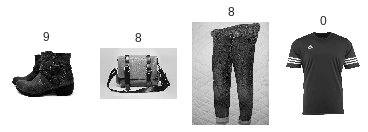

In [10]:
import cv2
images = ['ankle-boot.jpg', 'bag.jpg', 'trousers.jpg', 't-shirt.jpg']
for number in range(len(images)):
  imgLoaded = cv2.imread('Dataset/testing/%s'%(images[number]),0)
  img = cv2.resize(imgLoaded, (28, 28))
  img = np.invert(img)
  cv2.imwrite('test.jpg',img)
  img = (img.astype(np.float32))/255.0
  img = img.reshape(1, 28, 28, 1)
  plt.subplot(1,5,number+1),plt.imshow(imgLoaded,'gray')
  plt.title(np.argmax(model.predict(img)[0]))
  plt.xticks([]),plt.yticks([])
plt.show()
